# 1.3.5: World Population: Quadratic Model

<br>

---

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---


In the previous notebook we developed a population model where net growth during each time step is proportional to the current population. This model seems more realistic as an explanation of population growth than the constant growth model, but it does not fit the data as well.

<br>

We'll try one more model here, where net growth depends on the current population (as with the proportional model), but now the relationship between population and growth will be quadratic.  Let's see what that means....


<br>

---

In [ ]:
# @title
# Import Pandas and give it the shorthand name "pd"
import pandas as pd

# Define the file we want to import
address = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
file_loc = 'Images_and_Data/Data/World_pop_data.xlsx'

# Import the world population data
data = pd.read_excel(address + file_loc, header=0,index_col=0)
census = data.US_census
un = data.UN

---

## Quadratic Growth Model

The proportional model that we explored in the previous notebook calculates population growth as a function of the growth coefficient $\alpha$ and the current population $p$:

<br>

$$\Delta p = \alpha p$$

<br>

where $\Delta p$ is the net annual growth in the population.

<br>


In hopes of more closely matching the population data, in this notebook we'll test out a more complex *quadratic model* that adds another term to the right hand side:

<br>

$$\Delta p = \alpha p + \beta p^2$$

<br>

where $\beta$ is a second growth coefficient.




As we get better at understanding that equations *are* models, we can begin to think about how an equation will "behave" in different situations.  For instance, we might recognize that the population in the proportional model will grow much faster as $p$ gets bigger.  Now see if you can think about how the quadratic model will behave in the two questions here:

---
<br>

🟨 🟨  Active Reading: Multiple Choice

In [ ]:
import pandas as pd
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('1_3_world_pop',home,6)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

Look at the quadratic equation, and consider the effects of the parameter 'beta'.  When will 'beta' have the largest effect on the behavior of this population model?

A) Beta will have a large effect when 'p' is very small (close to zero)
B) Beta will have a large effect when 'p' is very large
C) Beta will have a large effect when 'p' is negative


---
<br>

🟨 🟨 Active Reading: Multiple Answer (Submit all correct letters, separated by a space)

In [ ]:
#@title { form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multAns('1_3_world_pop', home,7)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_multAns(data,a)

beta' will matter more as 'p' gets larger.   Assuming that 'alpha' is positive, if 'beta' was positive, this would mean growth would get even faster as 'p' grew.  But what will happen if  'beta' is negative? (Mark all that are true)

A) As 'p' is very large, the 'beta' term will be larger than the 'alpha' term, and will be negative, and so the population will shrink.
B) If 'p' is very large, the 'beta' term will be large and negative, and the population will return to zero.
C) If 'p' is very large, the 'beta' term will be large and negative, and the population will eventually be negative.
D) If 'p' starts relatively small, the population will grow until the positive 'alpha' term balances the negative 'beta' term, and growth will stop.


---

### Implementing the model

Remember that we rewrote `run_simulation` so that it takes the change function as one of its parameters?

In [ ]:
import pandas as pd

def run_simulation(system, change_func):
    results = pd.Series([],dtype=object)
    results[system['t_0']] = system['p_0']

    for t in range(system['t_0'], system['t_end']):
        growth = change_func(t, results[t], system)
        results[t+1] = results[t] + growth

    return results

That comes in handy here!  All we need to do to test out our new model is to write a new change function:

In [ ]:
def change_func_quad(t, pop, system):
    growth = system['alpha'] * pop + system['beta'] * pop**2
    return growth

Here's the `System` object we'll use, initialized with `t_0`, `p_0`, `t_end`, and the coefficients `alpha` and `beta`:

In [ ]:
t_0 = census.index[0]
p_0 = census[t_0]
t_end = census.index[-1]
alpha = 25 / 1000
beta = -1.8 / 1000

system = dict(t_0=t_0, p_0=p_0, t_end=t_end,
              alpha=alpha, beta=beta)

`alpha` and `beta` were chosen by trial and error; we'll see better ways to do it later.  Notice that `beta` is negative: as the population gets larger, the `beta` term will slow the growth of the population!  

<br> Let's call `run_simulation` and plot our results with the census data:

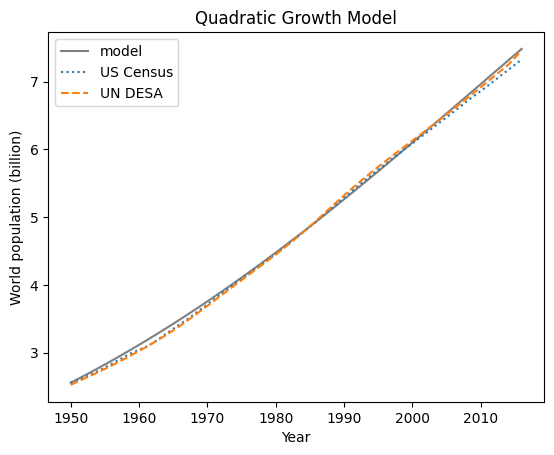

In [ ]:
results = run_simulation(system, change_func_quad)
results.plot(color='gray', label='model',title='Quadratic Growth Model',
             legend=True)
census.plot(style=':', label='US Census',legend=True)
un.plot(style='--', label='UN DESA', xlabel='Year',
             ylabel='World population (billion)',
           legend=True);


The model fits the data well over the whole range, with just a bit of space between them in the 1960s.

<br>

It is not entirely surprising that the quadratic model fits better than the
constant and proportional models, because it has two parameters we can
choose where the other models have only one. In general, the more
parameters you have to play with, the better you should expect the model
to fit.

<br>

Be careful, though.  While choosing a really complex function for a curve fit might give you an accurate fit, its explanatory usefulness can suffer: what do all of those coefficients represent in the physical system?  In the proportional model we know that `alpha` meant the difference between the birth and the death rates.   But what do `alpha` and `beta` *mean* here?

<br>

In this case, the quadratic model
might be a good choice for physical reasons, too: that is, there is a
legitimate reason to expect the relationship between growth and
population to have this form.  To understand why, let's look at net growth as a function of population.

### Investigating net growth in a quadratic system

<br>

Let's plot the relationship between growth and population in the quadratic model.  To do this, we'll make an array of 101 populations from 0 to 15 billion.  In the past, when we wanted an object that contained a list of numbers, we used `range`.  But `range` only works with integers.  To get a sequence of non-integer values, we can use `linspace`, which is defined in the NumPy library:

In [ ]:
import numpy as np

pop_array = np.linspace(0, 15, 101)

The arguments indicate where the sequence should start and stop, and how many elements it should contain. In this example, the sequence contains 101 equally-spaced numbers, starting at 0 and ending at 15.  The result is a NumPy array, which is a data storage object we have not seen before. An array is a object that contains a sequence of numbers:


In [ ]:
pop_array

array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
        1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,  2.4 ,  2.55,
        2.7 ,  2.85,  3.  ,  3.15,  3.3 ,  3.45,  3.6 ,  3.75,  3.9 ,
        4.05,  4.2 ,  4.35,  4.5 ,  4.65,  4.8 ,  4.95,  5.1 ,  5.25,
        5.4 ,  5.55,  5.7 ,  5.85,  6.  ,  6.15,  6.3 ,  6.45,  6.6 ,
        6.75,  6.9 ,  7.05,  7.2 ,  7.35,  7.5 ,  7.65,  7.8 ,  7.95,
        8.1 ,  8.25,  8.4 ,  8.55,  8.7 ,  8.85,  9.  ,  9.15,  9.3 ,
        9.45,  9.6 ,  9.75,  9.9 , 10.05, 10.2 , 10.35, 10.5 , 10.65,
       10.8 , 10.95, 11.1 , 11.25, 11.4 , 11.55, 11.7 , 11.85, 12.  ,
       12.15, 12.3 , 12.45, 12.6 , 12.75, 12.9 , 13.05, 13.2 , 13.35,
       13.5 , 13.65, 13.8 , 13.95, 14.1 , 14.25, 14.4 , 14.55, 14.7 ,
       14.85, 15.  ])

Now we'll use the quadratic model to compute net growth for each population, and create a `Series` that holds the relationship between population and net growth for the quadratic model.  

<br>

We can add and multiply arrays by integers in the same way we multiplied `Series` (note: to add arrays, they must have the same number of elements):

In [ ]:
# Calculate the annual growth for all populations between 0 and 15 billion
growth_array = (system['alpha'] * pop_array +
                system['beta'] * pop_array**2)

# Put this is a Series with populations as the index and the growth
# for that population as the values
quad_net_growth = pd.Series(data=growth_array,index=pop_array)

And let's plot the relationship:

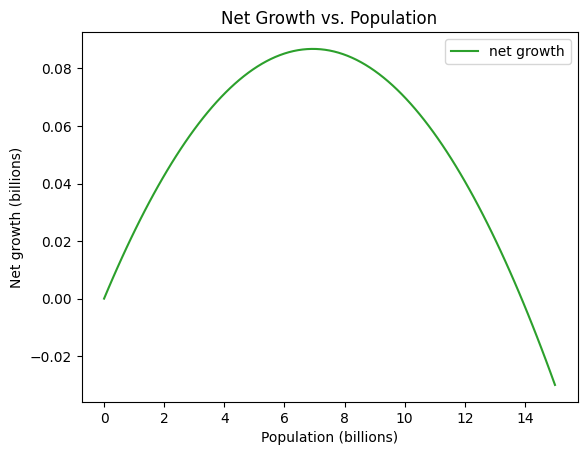

In [ ]:
quad_net_growth.plot(label='net growth', color='C2',
                     xlabel='Population (billions)',
                     ylabel='Net growth (billions)',
                     title='Net Growth vs. Population',
                    legend=True);

---

<br>

🟨 🟨 Active Reading: Matching (Submit all correct letters in order of Terms, separated by a space)

<br>

Remember that the quadratic equation is of the form $\Delta p = \alpha p - \beta p^2$ (since `beta` is negative) as you match the population size with the model behavior in this question


In [ ]:
#@title { form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data, number = display_match('1_3_world_pop', home,8)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_match(data,a, number)

Area of the Plot

Terms

1) Population: 0-3 billion
2) Population: 3-7 billion
3) Population 7-10 billion
4) Population: 12-14 billion
5) Population: Above 14 billion

Definitions

A) In this section, the alpha and beta terms are about the same size (growth is very small and sometimes negative)
B) In this section, the beta term is bigger than the alpha term (growth is negative)
C) This section is dominated by the alpha term (growth is small but always positive)
D) In this section, the alpha term is significantly bigger than the beta term (growth is large)


---

### Finding Equilibrium

Looking at the plot above tells us several interesting things.  First, with these parameters, the peak growth rate happens when the population is between 7-8 billion.  Second, we can see a point where growth is 0.  The *equilibrium point* is the population at which net population growth, $\Delta p$, is 0.

<br>

We can compute it by finding the roots, or zeros, of this equation:

<br>

$$\Delta p = \alpha p + \beta p^2$$

<br>

where $\alpha$ and $\beta$ are the parameters of the model.
If rewrite the right hand side like this:

<br>

$$\Delta p = p (\alpha + \beta p)$$
<br>

we can see that net growth $\Delta p$ is zero when either of the factors on the right hand side are zero:
<br>

 $$p=0$$

 $$\alpha + \beta p = 0$$
 <br>


If either of these conditions is true, the population growth is zero.  The first equation tells us that this is true when the population is zero: this solution is called a "trivial" solution, because it is an obvious and not useful solution (of course there is no growth if there are no people!).  The second equation, though, leads to a useful solution if we rearrange the equation:

<br>

$$ p = -\alpha / \beta$$

<br>

This gives us an analytical solution to equilibrium population in our model:

In [ ]:
-system['alpha']/ system['beta']

13.88888888888889

With these parameters, net growth is 0 when the population is about 13.9 billion.



This equilibrium value is so important to understanding the quadratic model that often we rewrite the equation with a different set of parameters.  In the context of population modeling, the quadratic model is more
conventionally written with the parameters $r$ and $K$, where $K$ is the equilibrium value:

<br>

$$\Delta p = r p (1 - p / K)$$

<br>

This is the same exact mathematical model; it's just a different way to *parameterize* it. If this is true, we can set the two equations as equal:

<br>

$$\Delta P = \alpha p + \beta p^2 = r p (1 - p / K)$$

<br>

By doing a little algebra, we could confirm that $r=\alpha$ and $K=-\alpha/\beta$.

<br>

Why use this more complex form of the equation?  It's easier to understand it as a model! That is, it is easier to interpret the parameters:

* $r$ is the unconstrained growth rate, observed when $p$ is small
* $K$ is the equilibrium point

$K$ is also called the *carrying capacity*, since it indicates the maximum population the environment can sustain.

---

<br>

🟨 🟨 Active Reading: Matching (Submit all correct letters in order of Terms, separated by a space)

In [ ]:
#@title { form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data, number = display_match('1_3_world_pop', home,9)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_match(data,a, number)

Look at the reparameterized equation, and match the condition below with the behavior of the model.  What happens when:

Terms

1) p' is much smaller than 'K'
2) p' is close to the value of 'K'
3) p' is much larger than K
4) r' is very large
5) r' is very small

Definitions

A) Delta p will be large and negative: the population will shrink
B) Delta p will tend to be large; its sign will cause the population to move quickly to equilibrium
C) Delta p will be small not matter what the other variables are
D) Delta p will tend to be large and positive, which will cause the population to grow quickly
E) Delta p will be positive but the rate of growth will depend on other variables


---

## Exercises

---

<br>

🟨 🟨  

### Exercise 1

In a previous section, we saw a different way to parameterize the quadratic model:

$$ \Delta p = r p (1 - p / K) $$

where $r=\alpha$ and $K=-\alpha/\beta$.  

<br>

Write a version of `change_func` that implements this version of the model.  Test it by computing the values of `r` and `K` that correspond to `alpha=0.025` and `beta=-0.0018`, and confirm that you get the same results for the annual growth in the first year of our model.

In [ ]:
# Define your parameters and create a system object that includes values for r and K



# Write a new change function called 'change_func_quad_rk'
# that uses r and K to calculate the change in population



In [ ]:
# Compare the growth created in 1950-1951 using the new and old form of change_func_quad
test1 = change_func_quad_rk(t_0,p_0,system)

test2 = change_func_quad(t_0,p_0,system)

print(test1,test2)

---

<br>

🟨 🟨  

### Exercise 2


What happens if we start with an initial population above the carrying capacity, like 20 billion?   Run the model from 1950 to 2016, but start with initial populations between 1 and 20 billion, and plot the results for each simulation on the same graph.

<br>

A couple hints:

1) If there are too many labels in the legend, you can plot results like this:

```
    results.plot(legend=False)
```

2) Everytime you use the plot function with a Series (i.e. `results.plot()`), it saves that sequence of data for a plot.  When you use the function a second time with a different sequence (say, with a plot with a different initial population), it does not erase the first sequence, but adds onto it.  So to put multiple lines on the same plot, you just need to run `results.plot` multiple times with a different `results` series.

3) In the final line of the cell, plot the UN and census data so that you can see how the census data compares to these models.


In [ ]:
# Define an array of starting populations from 1 to 20 billion using linspace



# Sweep through these starting populations using a 'for' loop and
# run_simulation; plot each result on the same plot (along with the
# UN and Census data)



---

<br>

🟨 🟨  

### Exercise 3

What does this plot tell you about quadratically modeled population growth?  Will the lines every cross?  What starting point would lead to the largest stable population?

✅ ✅  Put your answer here.